<a href="https://colab.research.google.com/github/SuhyeonHa/MatrixComputation/blob/master/Assignment08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forward Propagation in the Neural Networks

#### 1. Input Data

- load the data file ('mnist_test.csv')
- each row of the data consists of the label and the image pixel values in a vector form
- the label is one of the 10 digits from 0 to 9
- the image represents one of the 10 digits from 0 to 9 in grey scale and its size is 28x28

#### 2. Average Image for Each Digit

- take the arithmatic average of the image data with the same label for each digit

#### 3. Forward Propagation with Random Weights

- consider a neural network with a fully connected layer using a logistic unit
- the weights of the fully connected layer are given by random numbers sampled from the Normal distribution $`\mathcal{N}(0, 1)`$ with mean 0 and standard deviation 1
- compute the average of the output of the neural network using a logistic unit for the images of the same label for each digit


## Maching Learning Lecture
~ Lecture 8

https://www.youtube.com/playlist?list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN

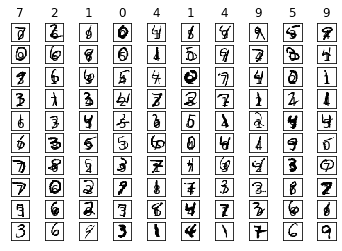

In [64]:
import matplotlib.pyplot as plt
import numpy as np

file_data   = '/content/drive/My Drive/Colab Notebooks/MatrixComputation/mnist_test.csv'
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

#
# make a matrix each column of which represents an images in a vector form 
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])

    list_label[count]       = label
    list_image[:, count]    = im_vector    

    count += 1

# 
# plot first 100 images out of 10,000 with their labels
# 
f1 = plt.figure(1)

for i in range(100):

    label       = list_label[i]
    im_vector   = list_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 10, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

In [65]:
print(f'num_image: {num_image}')
print(f'list_image.shape: {list_image.shape}')
print(f'list_label.shape: {list_label.shape}')

num_image: 10000
list_image.shape: (784, 10000)
list_label.shape: (10000,)


In [0]:
label_images = [] # for collecting images by each digit
repr_images = [] # representing images by each digit
num_label = 10
size_img = size_row * size_col # resolution
# repr_img = np.zeros((size_row, size_col), dtype=float)

for i in range(num_label):
  label_images.append(list())
  repr_images.append(np.zeros((size_row * size_col), dtype=float))

# colect images according to their labels
for j in range(num_label):
  for i in range(num_image):
    if list_label[i] == j:
        label_images[j].append(list_image[:, i])

for i in range(num_label):
  label_images[i] = np.array(label_images[i])

# calculate ans assign the average values
for i in range(num_label):
  for j in range(size_img):
    repr_images[i][j] = np.mean(label_images[i][j, :])

# for i in range(10):
#   print(repr_images[i].shape)

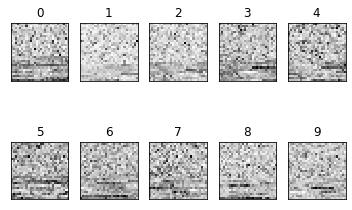

In [67]:
for i in range(num_label):

    label       = i
    im_vector   = repr_images[i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(2, 5, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

In [0]:
def sigmoid(z):
  temp = 1 + np.exp(-z)
  result = 1./temp
  np.nan_to_num(result, copy=False) # makes nan to min, inf to max
  return result

In [0]:
def linear(x, weights):
  print(x.shape)
  print(weights.shape)
  result = x@weights
  return result

In [70]:
np.random.seed(100)
theta1 = np.random.normal(0.0, 1.0, size=(num_image, num_image))
layer1 = linear(list_image, theta1)
print(weighted.shape)
out = sigmoid(weighted)
print(layer1.shape)

(784, 10000)
(10000, 10000)
(784, 10000)
(784, 10000)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [0]:
out_labels = []
out_repr_images = []

for i in range(num_label):
  out_labels.append(list())
  out_repr_images.append(np.zeros((size_row * size_col), dtype=float))

# colect images according to their labels
for j in range(num_label):
  for i in range(num_image):
    if list_label[i] == j:
        out_labels[j].append(layer1[:, i])

for i in range(num_label):
  out_labels[i] = np.array(out_labels[i])

# calculate ans assign the average values
for i in range(num_label):
  for j in range(size_img):
    out_repr_images[i][j] = np.mean(out_labels[i][j, :])


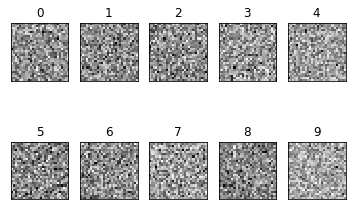

In [72]:
for i in range(num_label):

    label       = i
    im_vector   = out_repr_images[i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(2, 5, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()